# Reconhecimento de Dígitos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
warnings.filterwarnings('ignore')

In [2]:
test_redu_path = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_redu/test_redu.csv'
train_redu_path = 'https://raw.githubusercontent.com/mariabandeira/Reconhecimento-de-Digitos/main/dataset_redu/train_redu.csv'

train_redu = pd.read_csv(train_redu_path, sep=';')
test_redu = pd.read_csv(test_redu_path, sep=';')

# Comparação entre os classificadores

## Regressão Linear

In [5]:
with open('metrics_data/lin_train.pickle', 'rb') as data:
    classified_lin_train = pickle.load(data)

with open('metrics_data/lin_test.pickle', 'rb') as data:
    classified_lin_test = pickle.load(data)

# coluna que diz se a classificação foi correta ou não
train_redu['correct'] = classified_lin_train == train_redu['label']
test_redu['correct'] = classified_lin_test == test_redu['label']

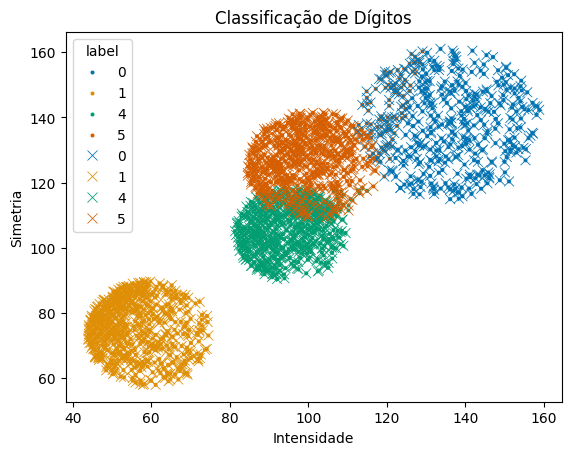

In [6]:
sns.scatterplot(x='intensidade', y='simetria', hue=classified_lin_train, data=train_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=train_redu['label'], data=train_redu, palette='colorblind', marker='x', s=50)
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

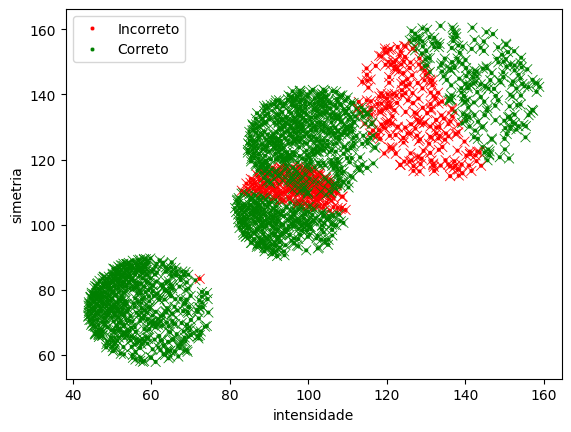

In [35]:
palette = {True: 'green', False: 'red'}
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=train_redu, palette=palette, s=10, marker='o', legend='full') #corretos
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=train_redu, palette=palette, s=50, marker='x', legend='full') #incorretos

# legenda manual
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], ['Incorreto', 'Correto'], loc='best')

plt.show()

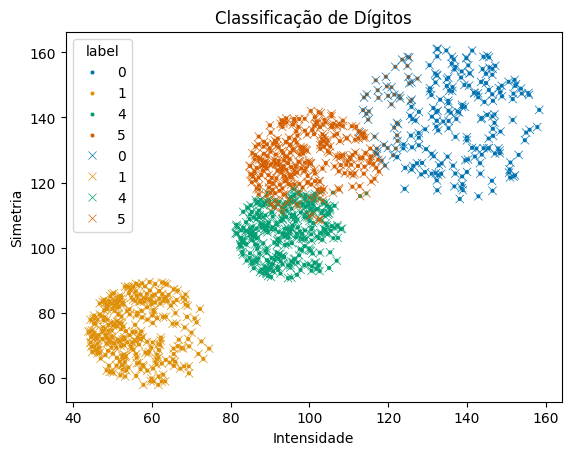

In [8]:
sns.scatterplot(x='intensidade', y='simetria', hue=classified_lin_test, data=test_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=test_redu['label'], data=test_redu, palette='colorblind', marker='x')
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

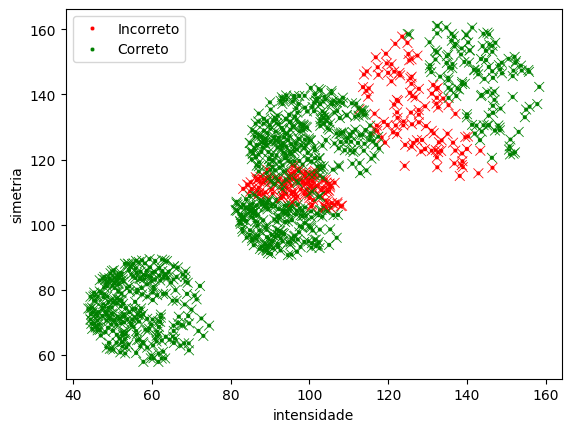

In [36]:
palette = {True: 'green', False: 'red'}
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=test_redu, palette=palette, s=10, marker='o', legend='full') #corretos
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=test_redu, palette=palette, s=50, marker='x', legend='full') #incorretos

# legenda manual
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], ['Incorreto', 'Correto'], loc='best')

plt.show()

In [10]:
#Computando o erro dentro da amostra (Ein)
N_in = len(train_redu)
eIn = 0
for i in range(N_in):
    if(classified_lin_train[i] != train_redu['label'][i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#Computando o erro dentro da amostra (Eout)
N_out = len(test_redu)
eOut = 0
for i in range(N_out):
    if(classified_lin_test[i] != test_redu['label'][i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.08920402561756634
Eout = 0.06726457399103139


[[322   0   0 103]
 [  0 608   0   0]
 [  0   0 561  16]
 [  0   0  76 500]]


<Axes: >

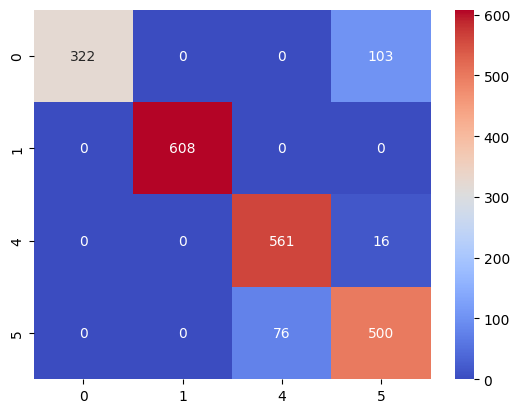

In [11]:
cm_train = confusion_matrix(train_redu['label'], classified_lin_train)
print(cm_train)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0,1,4,5], yticklabels=[0,1,4,5])

[[174   0   0  44]
 [  0 292   0   0]
 [  0   0 310   4]
 [  0   0  27 264]]


<Axes: >

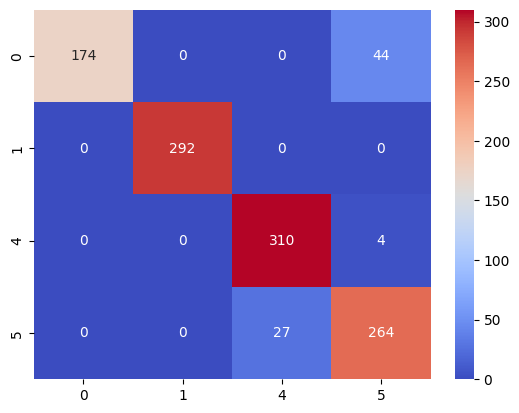

In [12]:
cm_test = confusion_matrix(test_redu['label'], classified_lin_test)
print(cm_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0,1,4,5], yticklabels=[0,1,4,5])

In [13]:
print(classification_report(train_redu['label'].tolist(), classified_lin_train))

              precision    recall  f1-score   support

           0       1.00      0.76      0.86       425
           1       1.00      1.00      1.00       608
           4       0.88      0.97      0.92       577
           5       0.81      0.87      0.84       576

    accuracy                           0.91      2186
   macro avg       0.92      0.90      0.91      2186
weighted avg       0.92      0.91      0.91      2186



In [14]:
print(classification_report(test_redu['label'].tolist(), classified_lin_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89       218
           1       1.00      1.00      1.00       292
           4       0.92      0.99      0.95       314
           5       0.85      0.91      0.88       291

    accuracy                           0.93      1115
   macro avg       0.94      0.92      0.93      1115
weighted avg       0.94      0.93      0.93      1115



## Perceptron

In [15]:
with open('metrics_data/pla_train.pickle', 'rb') as data:
    classified_pla_train = pickle.load(data)

with open('metrics_data/pla_test.pickle', 'rb') as data:
    classified_pla_test = pickle.load(data)

# coluna que diz se a classificação foi correta ou não
train_redu['correct'] = classified_pla_train == train_redu['label']
test_redu['correct'] = classified_pla_test == test_redu['label']

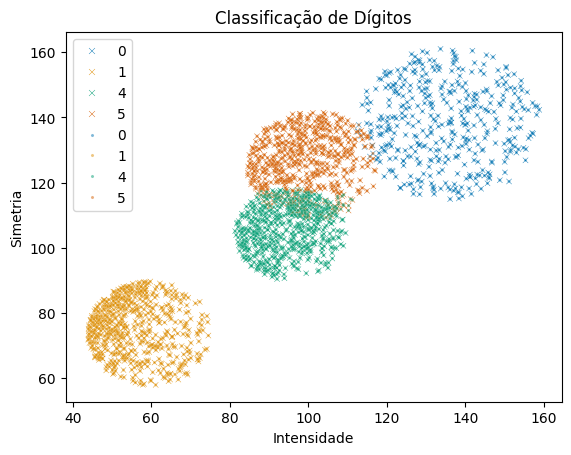

In [16]:
sns.scatterplot(x='intensidade', y='simetria', hue=train_redu['label'], data=train_redu, palette='colorblind', marker='x', s=15)
sns.scatterplot(x='intensidade', y='simetria', hue=classified_pla_train, data=train_redu, palette='colorblind', s=5, alpha=0.5)
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

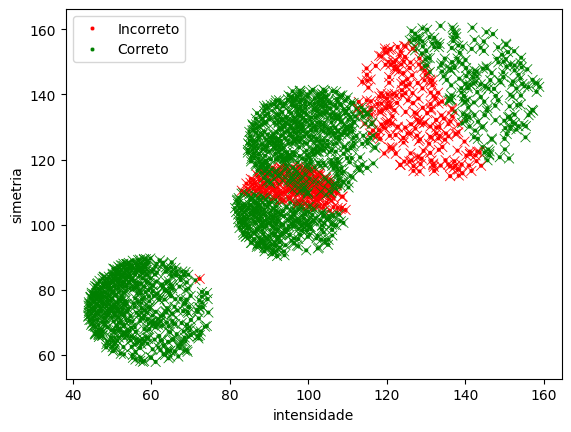

In [40]:
palette = {True: 'green', False: 'red'}
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=train_redu, palette=palette, s=10, marker='o', legend='full') #corretos
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=train_redu, palette=palette, s=50, marker='x', legend='full') #incorretos

# legenda manual
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], ['Incorreto', 'Correto'], loc='best')

plt.show()

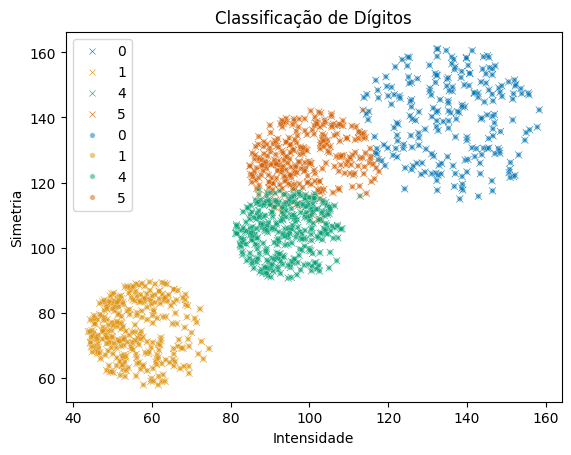

In [18]:
sns.scatterplot(x='intensidade', y='simetria', hue=test_redu['label'], data=test_redu, palette='colorblind', marker='x', s=25)
sns.scatterplot(x='intensidade', y='simetria', hue=classified_pla_test, data=test_redu, palette='colorblind', s=15, alpha=0.5)
plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

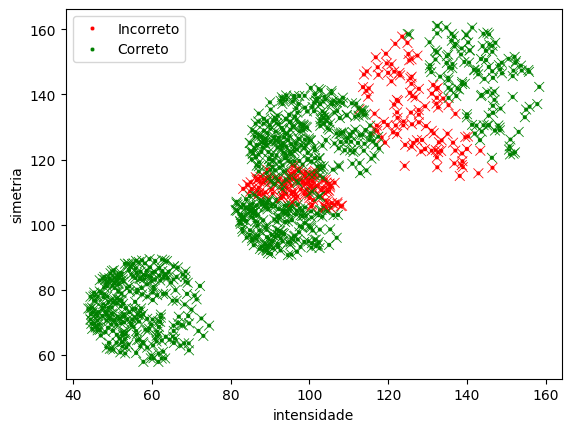

In [38]:
palette = {True: 'green', False: 'red'}
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=test_redu, palette=palette, s=10, marker='o', legend='full') #corretos
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=test_redu, palette=palette, s=50, marker='x', legend='full') #incorretos

# legenda manual
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], ['Incorreto', 'Correto'], loc='best')

plt.show()

In [20]:
#Computando o erro dentro da amostra (Ein)
N_in = len(train_redu)
eIn = 0
for i in range(N_in):
    if(classified_pla_train[i] != train_redu['label'][i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#Computando o erro dentro da amostra (Eout)
N_out = len(test_redu)
eOut = 0
for i in range(N_out):
    if(classified_pla_test[i] != test_redu['label'][i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.04117108874656908
Eout = 0.03228699551569507


[[418   0   0   7]
 [  0 608   0   0]
 [  0   0 572   5]
 [  0   0  78 498]]


<Axes: >

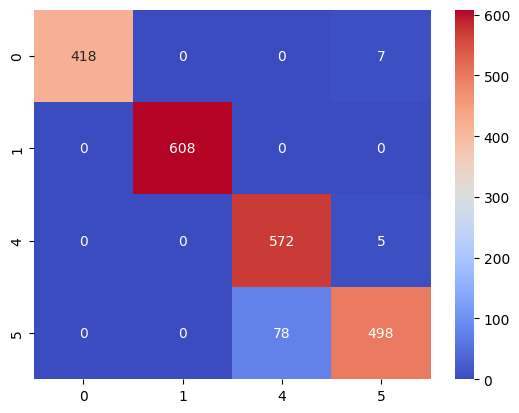

In [21]:
cm_train = confusion_matrix(train_redu['label'], classified_pla_train)
print(cm_train)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0,1,4,5], yticklabels=[0,1,4,5])

[[216   0   0   2]
 [  0 292   0   0]
 [  0   0 312   2]
 [  1   0  31 259]]


<Axes: >

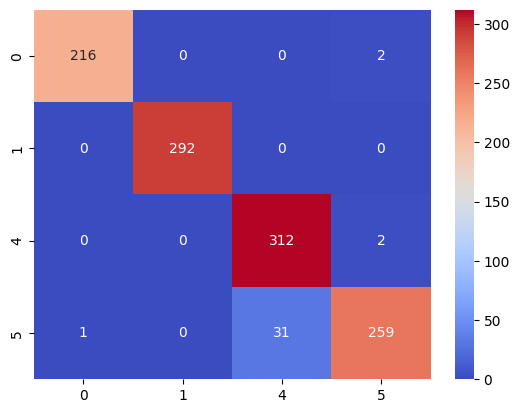

In [22]:
# Matriz de confusão
cm_test = confusion_matrix(test_redu['label'], classified_pla_test)
print(cm_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0,1,4,5], yticklabels=[0,1,4,5])

In [23]:
print(classification_report(train_redu['label'].tolist(), classified_pla_train))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       425
           1       1.00      1.00      1.00       608
           4       0.88      0.99      0.93       577
           5       0.98      0.86      0.92       576

    accuracy                           0.96      2186
   macro avg       0.96      0.96      0.96      2186
weighted avg       0.96      0.96      0.96      2186



In [24]:
print(classification_report(test_redu['label'].tolist(), classified_pla_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       218
           1       1.00      1.00      1.00       292
           4       0.91      0.99      0.95       314
           5       0.98      0.89      0.94       291

    accuracy                           0.97      1115
   macro avg       0.97      0.97      0.97      1115
weighted avg       0.97      0.97      0.97      1115



## Regressão Logística

In [25]:
with open('metrics_data/log_train.pickle', 'rb') as data:
    classified_log_train = pickle.load(data)

with open('metrics_data/log_test.pickle', 'rb') as data:
    classified_log_test = pickle.load(data)

# coluna que diz se a classificação foi correta ou não
train_redu['correct'] = classified_log_train == train_redu['label']
test_redu['correct'] = classified_log_test == test_redu['label']

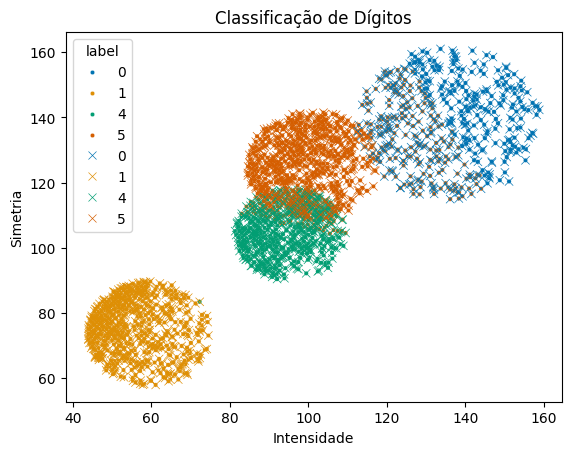

In [26]:
sns.scatterplot(x='intensidade', y='simetria', hue=classified_log_train, data=train_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=train_redu['label'], data=train_redu, palette='colorblind', marker='x')

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

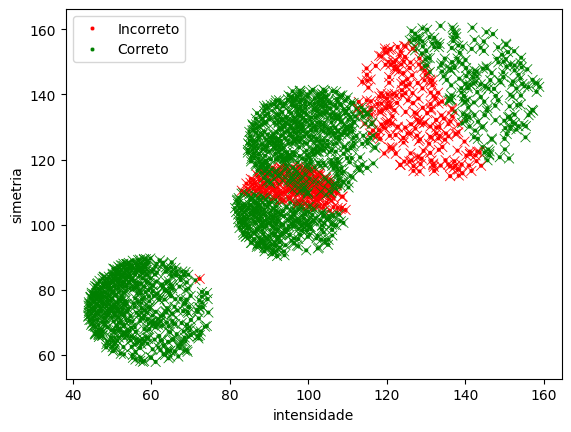

In [37]:
palette = {True: 'green', False: 'red'}
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=train_redu, palette=palette, s=10, marker='o', legend='full') #corretos
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=train_redu, palette=palette, s=50, marker='x', legend='full') #incorretos

# legenda manual
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], ['Incorreto', 'Correto'], loc='best')

plt.show()

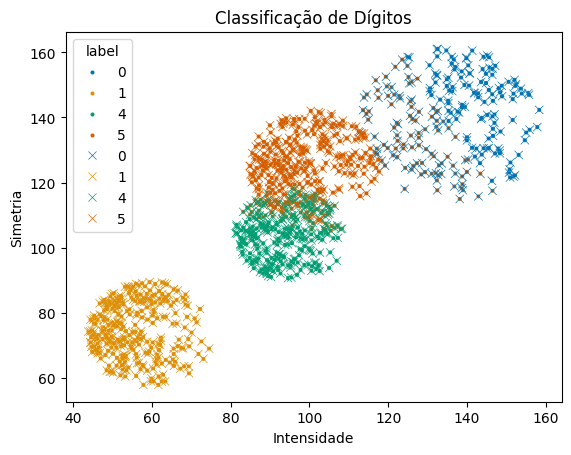

In [28]:
sns.scatterplot(x='intensidade', y='simetria', hue=classified_log_test, data=test_redu, palette='colorblind', s=10)
sns.scatterplot(x='intensidade', y='simetria', hue=test_redu['label'], data=test_redu, palette='colorblind', marker='x')

plt.xlabel('Intensidade')
plt.ylabel('Simetria')
plt.title('Classificação de Dígitos')
plt.show()

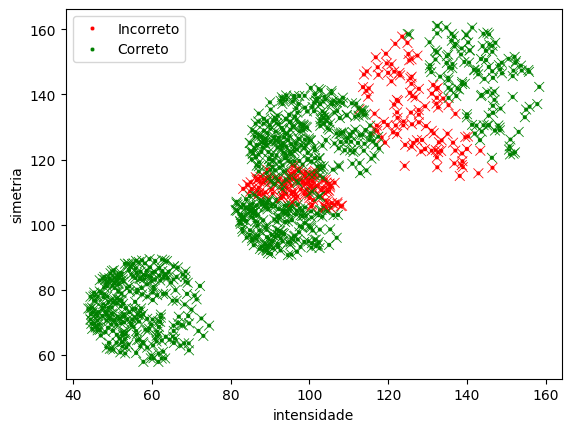

In [39]:
palette = {True: 'green', False: 'red'}
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=test_redu, palette=palette, s=10, marker='o', legend='full') #corretos
sns.scatterplot(x='intensidade', y='simetria', hue='correct', data=test_redu, palette=palette, s=50, marker='x', legend='full') #incorretos

# legenda manual
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles[:2], ['Incorreto', 'Correto'], loc='best')

plt.show()

In [30]:
#Computando o erro dentro da amostra (Ein)
N_in = len(train_redu)
eIn = 0
for i in range(N_in):
    if(classified_log_train[i] != train_redu['label'][i]):
        eIn += 1
eIn /= N_in
print("Ein = " + str(eIn))

#Computando o erro dentro da amostra (Eout)
N_out = len(test_redu)
eOut = 0
for i in range(N_out):
    if(classified_log_test[i] != test_redu['label'][i]):
        eOut += 1
eOut /= N_out
print("Eout = " + str(eOut))

Ein = 0.21454711802378773
Eout = 0.20269058295964126


[[204   0   0 221]
 [  0 607   1   0]
 [  0   0 330 247]
 [  0   0   0 576]]


<Axes: >

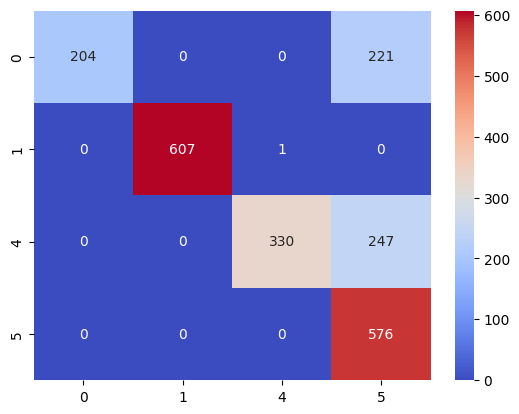

In [31]:
cm_train = confusion_matrix(train_redu['label'], classified_log_train)
print(cm_train)
sns.heatmap(cm_train, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0,1,4,5], yticklabels=[0,1,4,5])

[[118   0   0 100]
 [  0 292   0   0]
 [  0   0 188 126]
 [  0   0   0 291]]


<Axes: >

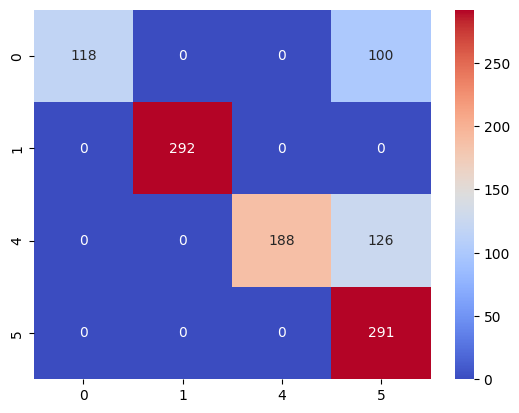

In [32]:
cm_test = confusion_matrix(test_redu['label'], classified_log_test)
print(cm_test)
sns.heatmap(cm_test, annot=True, fmt='d', cmap='coolwarm', xticklabels=[0,1,4,5], yticklabels=[0,1,4,5])

In [33]:
print(classification_report(train_redu['label'].tolist(), classified_log_train))

              precision    recall  f1-score   support

           0       1.00      0.48      0.65       425
           1       1.00      1.00      1.00       608
           4       1.00      0.57      0.73       577
           5       0.55      1.00      0.71       576

    accuracy                           0.79      2186
   macro avg       0.89      0.76      0.77      2186
weighted avg       0.88      0.79      0.78      2186



In [34]:
print(classification_report(test_redu['label'].tolist(), classified_log_test))

              precision    recall  f1-score   support

           0       1.00      0.54      0.70       218
           1       1.00      1.00      1.00       292
           4       1.00      0.60      0.75       314
           5       0.56      1.00      0.72       291

    accuracy                           0.80      1115
   macro avg       0.89      0.79      0.79      1115
weighted avg       0.89      0.80      0.80      1115



## Conclusão

Com base na acurácia mais alta observada, que foi de 97% com o modelo Perceptron, podemos concluir que este modelo se destaca como o melhor para este problema.